# Automating Port Operations

### This notebook was compiled by <span style='color:Blue'> Neelkantho Bose  </span> as part of completing the course titled "Deep Learning".

## To perform the following tasks:
        1.	Build a CNN network to classify the boat.
        2.	Build a lightweight model with the aim of deploying the solution on a mobile device using transfer learning. You can use any lightweight pre-trained model as the initial (first) layer. MobileNetV2 is a popular lightweight pre-trained model built using Keras API. 



Note:
1. There may be cells that contain rough code (mostly commented out). Pls ignore them.


###  1.1 : Import the necessary libraries and dataset
- Import the required libraries.
- Import the given dataset using the link provided.

In [48]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
from PIL import Image
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import pathlib
from tensorflow.keras.applications import MobileNetV2 
from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout, Dense, BatchNormalization 
from tensorflow.keras.models import Sequential

Found 1162 files belonging to 9 classes.
Using 930 files for training.
Found 1162 files belonging to 9 classes.
Using 232 files for validation.
Training Class names: ['buoy', 'cruise_ship', 'ferry_boat', 'freight_boat', 'gondola', 'inflatable_boat', 'kayak', 'paper_boat', 'sailboat']
Validation Class names: ['buoy', 'cruise_ship', 'ferry_boat', 'freight_boat', 'gondola', 'inflatable_boat', 'kayak', 'paper_boat', 'sailboat']
Training Dataset sample 10 images


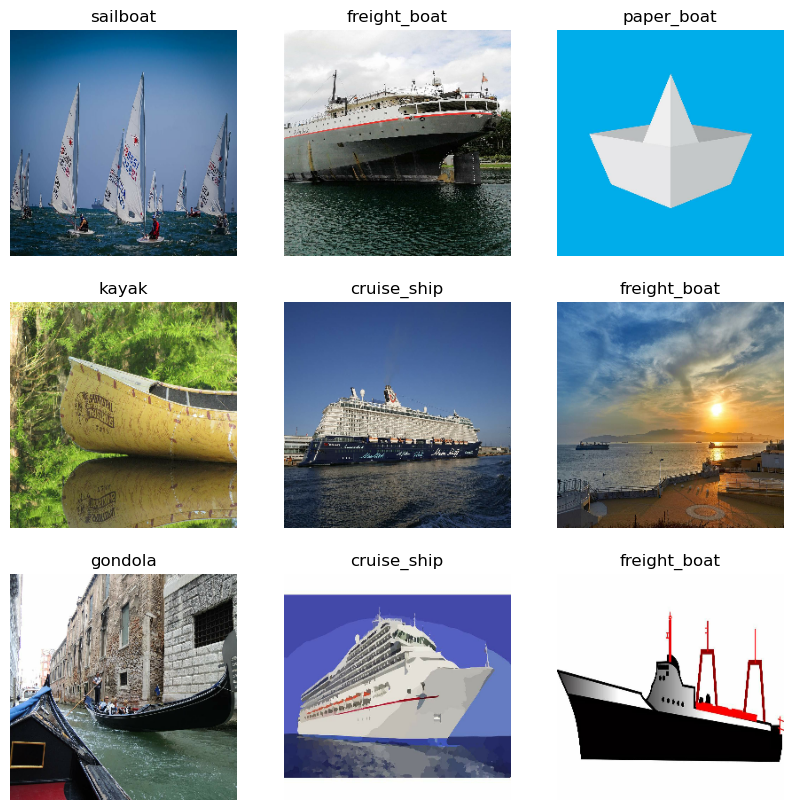

In [42]:
# Set parameters for dataset
batch_size = 32
img_height = 256
img_width = 256

directory_path='C:\\Users\\neelk\\OneDrive\\Desktop\\Simplilearn-DataScience-Course\\Course7\\project3\\Automating_Port_Operations_Dataset\\boat_type_classification_dataset\\'

# Create the dataset
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    directory_path,
    validation_split=0.2,  # Split the dataset into training and validation
    subset="training",  # Use this part as the training data
    seed=123,  # Seed for reproducibility
    image_size=(256, 256),  # Resize images to 256x256
    batch_size=32,  # Number of images to retrieve in one batch,
    shuffle=True
)

# Create the dataset
validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    directory_path,
    validation_split=0.2,  # Split the dataset into training and validation
    subset="validation",  # Use this part as the training data
    seed=123,  # Seed for reproducibility
    image_size=(256, 256),  # Resize images to 256x256
    batch_size=32,  # Number of images to retrieve in one batch
    shuffle=True
)


# Get the class names
tr_class_names = train_dataset.class_names
print("Training Class names:", tr_class_names)

val_class_names = validation_dataset.class_names
print("Validation Class names:", val_class_names)


# Visualize some images
import matplotlib.pyplot as plt

print("Training Dataset sample 10 images")
plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(tr_class_names[labels[i]])
        plt.axis("off")
plt.show()


In [43]:
# Set parameters for dataset
batch_size = 32
img_height = 256
img_width = 256

# Preprocess datasets
AUTOTUNE = tf.data.AUTOTUNE

def preprocess(image, label):
    image = tf.keras.layers.Rescaling(1./255)(image)
    return image, label

train_dataset = train_dataset.map(preprocess, num_parallel_calls=AUTOTUNE)
validation_dataset = validation_dataset.map(preprocess, num_parallel_calls=AUTOTUNE)

train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)

# Define and compile the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(9, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

# Fit the model
epochs = 20
history = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=epochs
)


Epoch 1/20
30/30 [==============================] - 42s 614ms/step - loss: 1.9219 - accuracy: 0.3226 - val_loss: 1.8887 - val_accuracy: 0.2759
Epoch 2/20
30/30 [==============================] - 21s 678ms/step - loss: 1.7820 - accuracy: 0.3495 - val_loss: 1.9039 - val_accuracy: 0.2759
Epoch 3/20
30/30 [==============================] - 23s 752ms/step - loss: 1.7748 - accuracy: 0.3495 - val_loss: 1.8853 - val_accuracy: 0.2759
Epoch 4/20
30/30 [==============================] - 23s 746ms/step - loss: 1.7716 - accuracy: 0.3495 - val_loss: 1.8663 - val_accuracy: 0.2759
Epoch 5/20
30/30 [==============================] - 23s 739ms/step - loss: 1.7533 - accuracy: 0.3505 - val_loss: 1.8838 - val_accuracy: 0.2888
Epoch 6/20
30/30 [==============================] - 22s 710ms/step - loss: 1.7433 - accuracy: 0.3581 - val_loss: 1.8874 - val_accuracy: 0.2974
Epoch 7/20
30/30 [==============================] - 22s 703ms/step - loss: 1.7145 - accuracy: 0.3699 - val_loss: 1.8218 - val_accuracy: 0.3017

In [44]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_26 (MaxPooli  (None, 127, 127, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_27 (Conv2D)          (None, 125, 125, 32)      9248      
                                                                 
 max_pooling2d_27 (MaxPooli  (None, 62, 62, 32)        0         
 ng2D)                                                           
                                                                 
 global_average_pooling2d_1  (None, 32)                0         
 3 (GlobalAveragePooling2D)                                      
                                                     

In [45]:
# Print the training and validation accuracies
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
print(f"Train Accuracy: {acc[-1]:.2f}")
print(f"Validation Accuracy: {val_acc[-1]:.2f}")


Train Accuracy: 0.41
Validation Accuracy: 0.39


Text(0.5, 1.0, 'Training and Validation Accuracy')

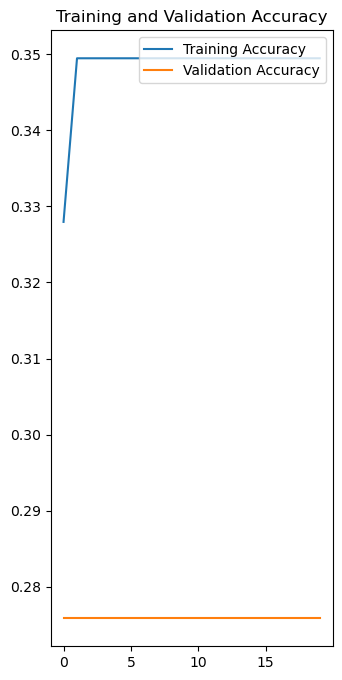

In [25]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='upper right')
plt.title('Training and Validation Accuracy')

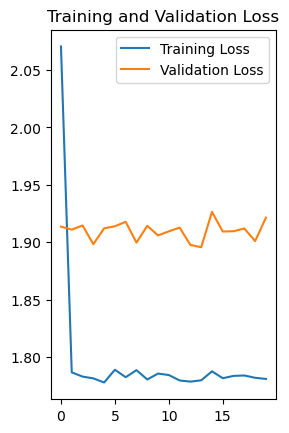

In [46]:
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Use a Lightweight model (pre-trained) - MobileNetV2

Found 1162 files belonging to 9 classes.
Using 814 files for training.
Found 1162 files belonging to 9 classes.
Using 348 files for validation.
Training Class names: ['buoy', 'cruise_ship', 'ferry_boat', 'freight_boat', 'gondola', 'inflatable_boat', 'kayak', 'paper_boat', 'sailboat']
Validation Class names: ['buoy', 'cruise_ship', 'ferry_boat', 'freight_boat', 'gondola', 'inflatable_boat', 'kayak', 'paper_boat', 'sailboat']
Training Dataset sample 10 images


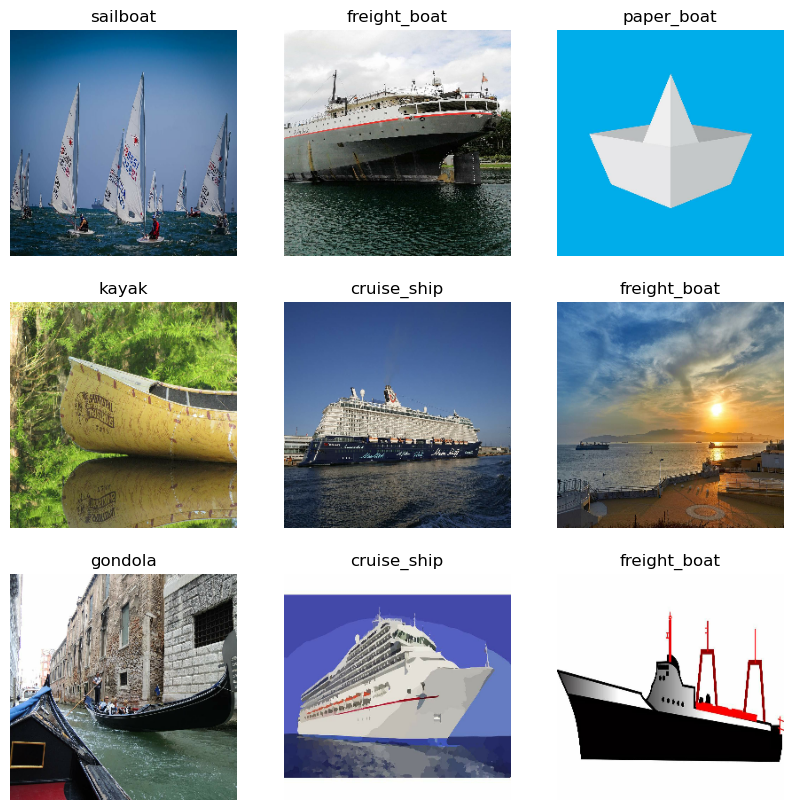

In [47]:
# Set parameters for dataset
batch_size = 32
img_height = 256
img_width = 256

directory_path='C:\\Users\\neelk\\OneDrive\\Desktop\\Simplilearn-DataScience-Course\\Course7\\project3\\Automating_Port_Operations_Dataset\\boat_type_classification_dataset\\'

# Create the dataset
prm_train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    directory_path,
    validation_split=0.3,  # Split the dataset into training and validation
    subset="training",  # Use this part as the training data
    seed=123,  # Seed for reproducibility
    image_size=(256, 256),  # Resize images to 256x256
    batch_size=32,  # Number of images to retrieve in one batch,
    shuffle=True
)

# Create the dataset
prm_validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    directory_path,
    validation_split=0.3,  # Split the dataset into training and validation
    subset="validation",  # Use this part as the training data
    seed=123,  # Seed for reproducibility
    image_size=(256, 256),  # Resize images to 256x256
    batch_size=32,  # Number of images to retrieve in one batch
    shuffle=True
)


# Get the class names
prm_tr_class_names = prm_train_dataset.class_names
print("Training Class names:", prm_tr_class_names)

prm_val_class_names = prm_validation_dataset.class_names
print("Validation Class names:", prm_val_class_names)


# Visualize some images
import matplotlib.pyplot as plt

print("Training Dataset sample 10 images")
plt.figure(figsize=(10, 10))
for images, labels in prm_train_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(tr_class_names[labels[i]])
        plt.axis("off")
plt.show()


In [50]:
# Set parameters for dataset
batch_size = 32
img_height = 256
img_width = 256

# Preprocess datasets
AUTOTUNE = tf.data.AUTOTUNE

def preprocess(image, label):
    image = tf.keras.layers.Rescaling(1./255)(image)
    return image, label

prm_train_dataset = prm_train_dataset.map(preprocess, num_parallel_calls=AUTOTUNE)
prm_validation_dataset = prm_validation_dataset.map(preprocess, num_parallel_calls=AUTOTUNE)

prm_train_dataset = prm_train_dataset.prefetch(buffer_size=AUTOTUNE)
prm_validation_dataset = prm_validation_dataset.prefetch(buffer_size=AUTOTUNE)

# Load MobileNetV2 model, exclude the top layers, and use pre-trained weights from 'imagenet' 
base_model = MobileNetV2(input_shape=(256, 256, 3), include_top=False, weights='imagenet')

# Freezing the base model 
base_model.trainable = False

# Define and compile the model
# Build the model 
model = Sequential([ base_model, 
                    GlobalAveragePooling2D(), 
                    Dropout(0.2), 
                    Dense(256, activation='relu'), 
                    BatchNormalization(), 
                    Dropout(0.1), 
                    Dense(128, activation='relu'), 
                    BatchNormalization(), 
                    Dropout(0.1), 
                    Dense(9, activation='softmax')])
                

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

# Fit the model
epochs = 50
history = model.fit(
    prm_train_dataset,
    validation_data=prm_validation_dataset,
    epochs=epochs
)


9406464/9406464 [==============================] - 1s 0us/step
Epoch 1/50
26/26 [==============================] - 17s 580ms/step - loss: 1.3202 - accuracy: 0.6032 - val_loss: 0.8828 - val_accuracy: 0.7356
Epoch 2/50
26/26 [==============================] - 18s 678ms/step - loss: 0.3997 - accuracy: 0.8759 - val_loss: 0.5882 - val_accuracy: 0.8190
Epoch 3/50
26/26 [==============================] - 19s 700ms/step - loss: 0.2757 - accuracy: 0.9177 - val_loss: 0.5341 - val_accuracy: 0.8477
Epoch 4/50
26/26 [==============================] - 19s 702ms/step - loss: 0.1845 - accuracy: 0.9484 - val_loss: 0.5317 - val_accuracy: 0.8247
Epoch 5/50
26/26 [==============================] - 19s 702ms/step - loss: 0.1523 - accuracy: 0.9582 - val_loss: 0.5510 - val_accuracy: 0.8190
Epoch 6/50
26/26 [==============================] - 19s 696ms/step - loss: 0.1083 - accuracy: 0.9767 - val_loss: 0.4775 - val_accuracy: 0.8506
Epoch 7/50
26/26 [==============================] - 19s 720ms/step - loss: 0.06

In [51]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 8, 8, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d_1  (None, 1280)              0         
 4 (GlobalAveragePooling2D)                                      
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense_36 (Dense)            (None, 256)               327936    
                                                                 
 batch_normalization (Batch  (None, 256)               1024      
 Normalization)                                                  
                                                     

In [53]:
# Print the training and validation accuracies For MobileNetV2 model
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
print(f"Train Accuracy with MobileNetV2: {acc[-1]:.2f}")
print(f"Validation Accuracy with MobileNetV2: {val_acc[-1]:.2f}")

Train Accuracy with MobileNetV2: 1.00
Validation Accuracy with MobileNetV2: 0.87


Text(0.5, 1.0, 'Training and Validation Accuracy with MobileNetV2')

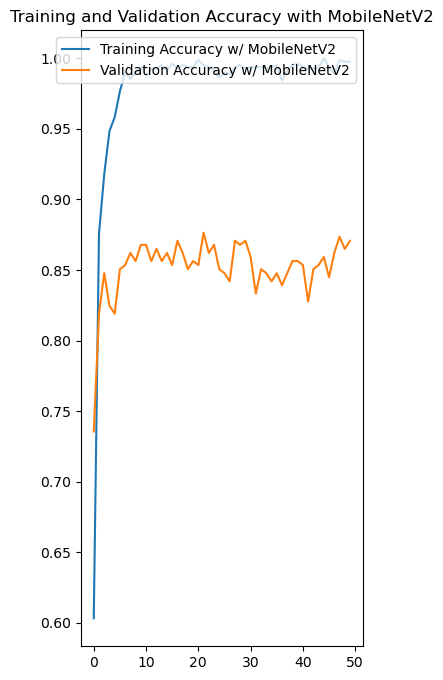

In [54]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy w/ MobileNetV2')
plt.plot(epochs_range, val_acc, label='Validation Accuracy w/ MobileNetV2')
plt.legend(loc='upper right')
plt.title('Training and Validation Accuracy with MobileNetV2')

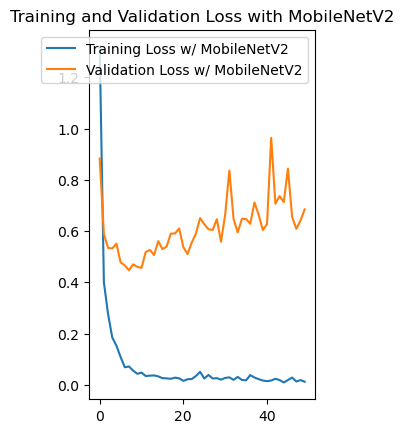

In [55]:
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss w/ MobileNetV2')
plt.plot(epochs_range, val_loss, label='Validation Loss w/ MobileNetV2')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss with MobileNetV2')
plt.show()

**Observation:**

The output indicates the following:

- The evaluation was performed on both custom CNN model and a Pre-trained model (MobileNetV2)
- Custom CNN Model 
    - Results: **Train Accuracy was 0.41 and Validation Accuracy was 0.39**
- Pre-Trained Model-MobileNetV2
    - Results: **Train Accuracy was 1.00 and Validation Accuracy was 0.87**

Therefore, it can be seen that a **Pre-trained Lightweight Model like MobileNetV2 performs much better than a custom CNN model.**
